In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [17]:
# global

# location of data
f_loc   = "data/"

# Location to save figures
plt_loc = f_loc+"plots/"

### Main

**I.** Plot of sample data in repository, "1_kdvVARS.txt"

writing to... data/plots/PLT_00000101_00001001_04_00.png
Numerical solution of $\partial _tu+\partial_{xxx}u+6u\partial _xu=0$ for $c$ = 4 and $a$ = 0. Grid cell step chosen as $\Delta x =$ 0.2 with timestep $\Delta t =$ 0.001 integrated over the range of time $t_{range}$ = [0.0, 1.0].


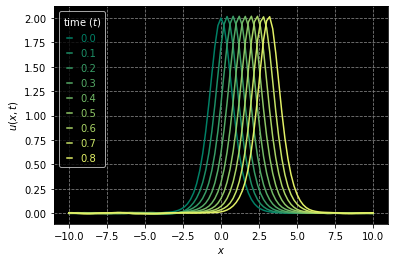

In [18]:
fvars = get_vars("data/plotdata/1_","kdvVARS.txt")
kdvplot(0, 900, 100, fvars, plt_loc, key=True, sol=False, addlabel = "")

**II.** Plot of latest created VARS file

writing to... data/plots/PLT_00000101_00010001_04_00_solo.png
Numerical solution of $\partial _tu+\partial_{xxx}u+6u\partial _xu=0$ for $c$ = 4 and $a$ = 0. Grid cell step chosen as $\Delta x =$ 0.0314159 with timestep $\Delta t =$ 0.0001 integrated over the range of time $t_{range}$ = [0.0, 1.0].


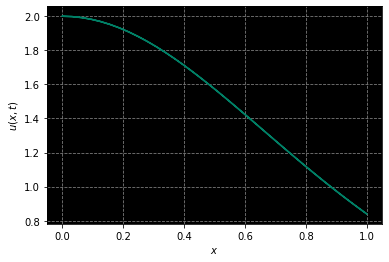

In [19]:
fvars = get_vars(f_loc,"kdvVARS.txt")
kdvplot(0, 1, 1, fvars, plt_loc, key=False, sol=False, addlabel = "solo")

### Plot Functions

In [22]:
class KdVParameters:
  def __init__(self, tag, dat, sol, x, N, M, c, a, dx, t0, tn, dt):
    self.tag = tag
    self.dat = dat
    self.sol = sol
    self.x   = x
    self.N   = N
    self.M   = M
    self.c   = c
    self.a   = a
    self.dx  = dx
    self.t0  = t0
    self.tn  = tn
    self.dt  = dt
    
'''
NAME: get_vars
DESC: Unpacks variables (VARS) file


'''
def get_vars(location, vfilename):
    v_vals  = []

    # open file
    varfile = open(location+vfilename,'r') 

    # read 
    vlines  = varfile.readlines()
    for x in vlines:
        v_vals.append(x.split()[1])

    # close file
    varfile.close()
    
    # general variables and constants
    tag = v_vals[1]
    tag = v_vals[1].replace(".txt","").rstrip(tag[-3:])
    N   = int(v_vals[2])
    M   = int(v_vals[3])
    c   = int(v_vals[4])
    a   = int(v_vals[5])
    dx  = float(v_vals[8])
    t0  = float(v_vals[9])
    tn  = float(v_vals[10])
    dt  = float(v_vals[11])
    
    # data
    dat = np.loadtxt(location+"kdvDAT"+v_vals[1], usecols=range(1,M-1))
    sol = np.loadtxt(location+"kdvSOL"+v_vals[1], usecols=range(1,M-1))
    x   = np.loadtxt(location+"kdvSOL"+v_vals[1], usecols=0)
    
    return KdVParameters(tag, dat, sol, x, N, M, c, a, dx, t0, tn, dt)

def get_vars_spec(location, vfilename, vtag):
    v_vals  = []

    # open file
    varfile = open(location+vfilename,'r') 

    # read 
    vlines  = varfile.readlines()
    for x in vlines:
        v_vals.append(x.split()[1])

    # close file
    varfile.close()
    
    # general variables and constants
    tag = v_vals[1]
    tag = v_vals[1].replace(".txt","").rstrip(tag[-3:])
    N   = int(v_vals[2])
    M   = int(v_vals[3])
    c   = int(v_vals[4])
    a   = int(v_vals[5])
    dx  = float(v_vals[8])
    t0  = float(v_vals[9])
    tn  = float(v_vals[10])
    dt  = float(v_vals[11])
    
    # data
    dat = np.loadtxt(location+"kdvDAT_"+vtag+".txt", usecols=range(1,M-1))
    sol = np.loadtxt(location+"kdvSOL_"+vtag+".txt", usecols=range(1,M-1))
    x   = np.loadtxt(location+"kdvSOL_"+vtag+".txt", usecols=0)
    
    return KdVParameters(tag, dat, sol, x, N, M, c, a, dx, t0, tn, dt)

In [23]:
'''
kdvplot: plots kdv data from VARs file in stylized manor.

Optional parameters:  key = shows (TRUE) or hides (FALSE) legend on plot
                      sol = shows (TRUE) or hides (FALSE) plot of exact solution
                        

'''

def kdvplot(t_start, t_stop, intrvl, fvars, plt_loc, key=True, sol=True, addlabel=""):
    
    # get color index
    n = abs(int((t_start-t_stop)/intrvl))+1
    nx = 0
    
    # set colormap
    setcolor = plt.cm.summer(np.linspace(0,1,n))
    
    for tx in range(t_start, t_stop, intrvl):
    
        # find time
        time = str(round(tx*fvars.dt,8))
    
        # set grid
        ax = plt.gca()
        ax.set_facecolor((0, 0, 0))
        ax.grid(b=True, which='major', color='gray', linestyle='--')
        
        # plot experimental data
        plt.plot(fvars.x, fvars.dat[:,tx], 
                 label=time, 
                 color=setcolor[nx])
        
        # theoretical data
        capsol = ""
        if sol == True:
            plt.plot(fvars.x, fvars.sol[:,tx],
                     linestyle="--",
                     linewidth = .9,
                     label="sol",
                     color = 'white')
            capsol = " plotted against our theoretical value at t= "+str(time)

        # plot attributes
        #plt.title("Numerical solution of the KdV Equation")
        plt.xlabel("$x$")
        plt.ylabel("$u(x,t)$")
        
        plt.label='Inline label'
        
        # legend (optional)
        if key == True:
            #bbox_to_anchor=(1.05, 1)
            #title='time ($t$)
            legend = plt.legend(title='time ($t$)', loc='upper left',
                       labelcolor='linecolor', 
                       handlelength = 0.5,
                       #edgecolor = 'white',
                       facecolor='black')
            
            plt.setp(legend.get_title(), color='white')
            

        
        nx= nx+1
        
    # caption    
    captxt = 'Numerical solution of $\partial _tu+\partial_{xxx}u+6u\partial _xu=0$'+capsol+' for $c$ = '+str(fvars.c)+' '\
    'and $a$ = '+str(fvars.a)+'. Grid cell step chosen as $\Delta x =$ '+str(fvars.dx)+' '\
    'with timestep $\Delta t =$ '+str(fvars.dt)+' '\
    'integrated over the range of time $t_{range}$ = ['+str(fvars.t0)+', '+str(fvars.tn)+"]."
    
    
    #print(plt_loc+"PLT"+fvars.tag+'.png')
    
    if addlabel != "":
        addlabel = '_'+addlabel
    
    pltstr = plt_loc+"PLT"+fvars.tag+addlabel+'.png'
    capstr = plt_loc+'CAP'+fvars.tag+addlabel+".txt"
    
    # save image to file
    plt.savefig(pltstr, format='png', dpi=800)
    
    # save cpation to file
    caption = open(capstr,"a")
    caption.write(captxt)
    caption.close()
    
    print("writing to... "+pltstr)
    
    print(captxt)

In [24]:
def kdv_aniplot(t_start, t_stop, intrvl, fvars, plt_loc, key=True, sol=True, addlabel=""):
    
    # get color index
    n = abs(int((t_start-t_stop)/intrvl))+1
    nx = 0
    
    # set colormap
    setcolor = pl.cm.summer(np.linspace(0,1,n))
    
    for tx in range(t_start, t_stop, intrvl):
    
        # find time
        time = str(round(tx*fvars.dt,8))
    
        # set grid
        ax = plt.gca()
        ax.set_facecolor((0, 0, 0))
        ax.grid(b=True, which='major', color='gray', linestyle='--')
        
        # plot experimental data
        plt.plot(fvars.x, fvars.dat[:,tx], 
                 label=time, 
                 color=setcolor[nx])
        
        # theoretical data
        capsol = ""
        if sol == True:
            plt.plot(fvars.x, fvars.sol[:,tx],
                     linestyle="--",
                     linewidth = .9,
                     label="sol",
                     color = 'white')
            capsol = " plotted against our theoretical value at t= "+str(time)

        # plot attributes
        #plt.title("Numerical solution of the KdV Equation")
        plt.xlabel("$x$")
        plt.ylabel("$u(x,t)$")
        
        plt.label='Inline label'
        
        # legend (optional)
        if key == True:
            #bbox_to_anchor=(1.05, 1)
            #title='time ($t$)
            legend = plt.legend(title='time ($t$)', loc='upper left',
                       labelcolor='linecolor', 
                       handlelength = 0.5,
                       #edgecolor = 'white',
                       facecolor='black')
            
            plt.setp(legend.get_title(), color='white')
            

        
        nx= nx+1
        
  
    #print(plt_loc+"PLT"+fvars.tag+'.png')
    
    if addlabel != "":
        addlabel = '_'+addlabel
    

### Animation


No handles with labels found to put in legend.
No handles with labels found to put in legend.


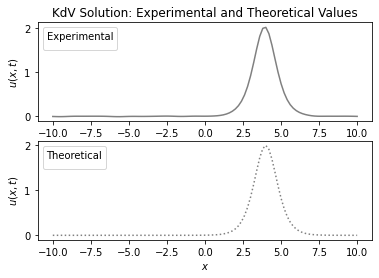

In [104]:
from matplotlib import animation, rc
from celluloid import Camera
from IPython.display import HTML

# get data
fvars = get_vars("data/plotdata/1_","kdvVARS.txt")

# set up plots
fig, (ax1, ax2) = plt.subplots(2)

# plotting loop for animation
camera = Camera(fig)
tx = np.linspace(0, fvars.M-4)
for i in tx:
    i = int(i)
    ax1.plot(fvars.x, fvars.dat[:,i], color='gray')
    ax2.plot(fvars.x, fvars.sol[:,i], color='gray',linestyle=":")
    camera.snap()
    
# plot attributes
ax1.set(xlabel="$x$",ylabel="$u(x,t)$", title="KdV Solution: Experimental and Theoretical Values")
ax2.set(xlabel="$x$",ylabel="$u(x,t)$")

# plot labels (tricked as legend)
ax1.legend(title='Experimental', loc='upper left')
ax2.legend(title='Theoretical', loc='upper left')
mov = camera.animate() 

# save aninimation (gif)
'''
giffile = r"kdv_comparison.gif" 
writergif = animation.PillowWriter(fps=30) 
mov.save(giffile, writer=writergif)
plt.show()
'''

'''
WARNING:(!) did not build in method to override exisiting file,
            so if the .gif file already exists code will give you grief
            and you must choose a new name 
'''
